In [1]:
import pyforest

In [2]:
airpas = pd.read_csv('AirPassengers.csv')

<IPython.core.display.Javascript object>

In [3]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
airpas.isnull().sum()

Month         0
Passengers    0
dtype: int64

# AIM is to Forecast the passengers volume for next 6 months to 1 year.

In [5]:
airpas.shape
# Passengers list is in 1000's
# AIM is to Forecast the passengers volumne for next 6 onths to 1 year.

(144, 2)

In [6]:
airpas.Month = pd.to_datetime(airpas.Month,  infer_datetime_format = True) # Convert into datetime format

<IPython.core.display.Javascript object>

In [7]:
ind_airpas = airpas.set_index(['Month']) # Month gets converted to index

In [8]:
ind_airpas.head(15)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [9]:
ind_airpas.shape

(144, 1)

<IPython.core.display.Javascript object>

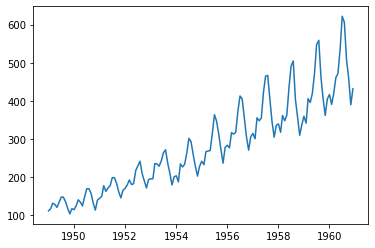

In [10]:
plt.plot(ind_airpas) # This is not stationary beacause Mean and Variance Changes is nnot Constant

<IPython.core.display.Javascript object>

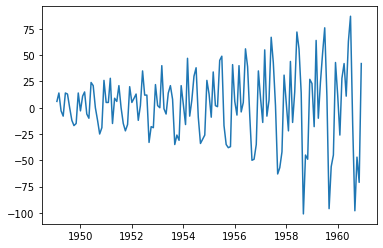

In [11]:
plt.plot(ind_airpas.diff()) # after differencing This is not stationary beacause Variance Changes is not Constant though now mean is constant

<IPython.core.display.Javascript object>

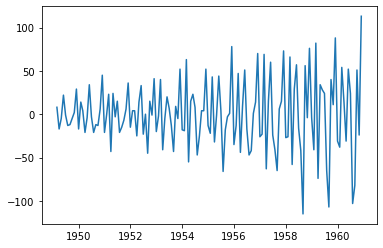

In [12]:
plt.plot(ind_airpas.diff().diff()) # 2nd level of diiferencing

<IPython.core.display.Javascript object>

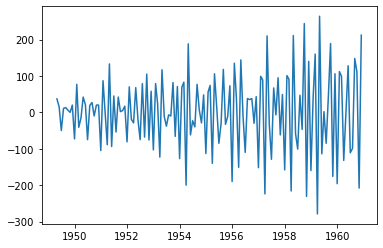

In [13]:
plt.plot(ind_airpas.diff().diff().diff().diff())

In [14]:
# Even After Doing Diffferencing More than 10 times series was not stationary.

# take a log now

In [15]:
ind_airpas_log = np.log(ind_airpas)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

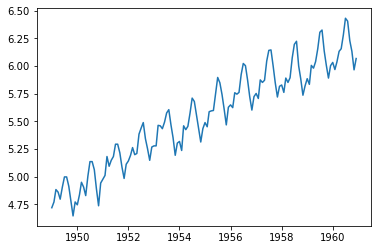

In [16]:
plt.plot(ind_airpas_log) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

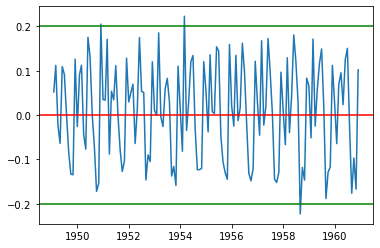

In [17]:
plt.plot(ind_airpas_log.diff()) # Now it is almost Stationary
plt.axhline(y = 0, color = 'red')
plt.axhline(y = 0.2, color = 'g')
plt.axhline(y = -0.2, color = 'g')

In [18]:
# NOTE 
# value of I is 1  One level of diferencing
# but my original Series has changed now my base series is log
# model will be build on log so at the end  take the anti log

In [19]:
# but what ever values we get from ACF and PACF are not binding

In [20]:
from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

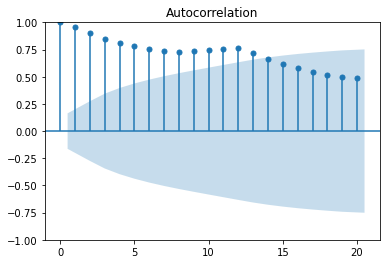

In [21]:
plot_acf(ind_airpas_log.Passengers, lags= 20); # No Information because slow decrease.

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


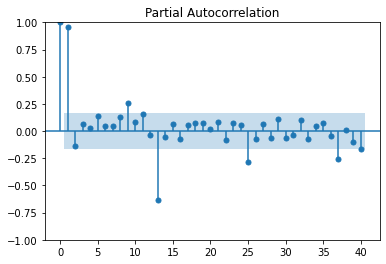

In [22]:
plot_pacf(ind_airpas_log.Passengers, lags=40); 

In [23]:
import pmdarima
from pmdarima import auto_arima
auto_arima(airpas['Passengers'], seasonal = True, m=12)

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
model = SARIMAX(ind_airpas_log, order=(2,1,0))
result = model.fit();

C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [26]:
result.params # params is your Parameters

ar.L1     0.241243
ar.L2    -0.166492
sigma2    0.010582
dtype: float64

In [27]:
fore_values = result.forecast(steps = 12) # it will do the forecast for next 12 time period in this case next 12 months

In [28]:
# Fore_Values

In [29]:
fore_values[0] # Prediction in log

6.120945635781832

In [30]:
np.round(np.exp(fore_values[0])) # Taking anti log 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

455.0

In [31]:
# Can i find the Error (Forecast is for future values and we do not have the actual values for the future.)

In [32]:
# we can not do random sampling but we can do sequential sampling
# build the model till 1959 an dforecast for 1960

In [33]:
forecast_values = result.forecast(steps = 12)

In [47]:
# forecast_values[0]

In [52]:
forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df = np.exp(forecast_values_df)
forecast_values_df

<IPython.core.display.Javascript object>

ValueError: DataFrame constructor not properly called!

In [38]:
forecast_values_df.rename(columns= {forecast_values_df.columns[0] : 'Predicted'} , inplace = True)

NameError: name 'forecast_values_df' is not defined

In [ ]:
# forecast_values_df

In [ ]:
date_for_pred = ['1961-01-01' , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01',
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']

In [ ]:
forecast_values_df = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)

In [ ]:
forecast_values_df.rename(columns= {forecast_values_df.columns[1] : 'Month'} , inplace = True)

In [ ]:
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )

In [ ]:
pred_airpas = forecast_values_df.set_index(['Month'])
pred_airpas.head()

In [ ]:
ind_airpas['Passengers'].plot(legend = True , label = "Original" , color ="green") # original
pred_airpas['Predicted'].plot(legend = True , label = "Predicted" , color ="red") # predicted

# Train and Test

In [53]:
airpas = pd.read_csv('AirPassengers.csv')
airpas.Month = pd.to_datetime(airpas.Month,  infer_datetime_format = True) # Convert into datetime format
ind_airpas = airpas.set_index(['Month']) # Month gets converted to index

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
train = ind_airpas.iloc[0:132] # Last 11 years
test = ind_airpas.iloc[132: 144] # Last 1 year

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Month'>

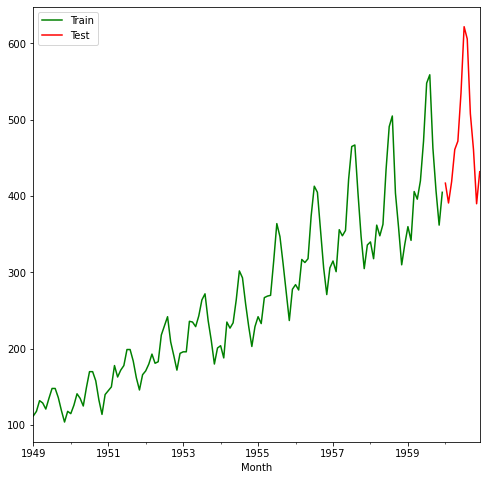

In [55]:
plt.figure(figsize =(8 , 8))
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
test['Passengers'].plot(legend = True , label = "Test" , color ="red")

In [ ]:
train_log = np.log(train)

In [ ]:
model = ARIMA(train_log, order=(8,1,2))
result = model.fit()


forecast_values = result.forecast(steps = 24)
forecast_values

forecast_values[0]

forecast_values_df = pd.DataFrame(forecast_values[0])
forecast_values_df

forecast_values_df = np.exp(forecast_values_df)

In [ ]:
date_for_pred = ['1960-01-01' , '1960-02-01' ,
                 '1960-03-01', '1960-04-01','1960-05-01',
                 '1960-06-01', '1960-07-01','1960-08-01',
                 '1960-09-01', '1960-10-01','1960-11-01',
                 '1960-12-01',
                 '1961-01-01' , '1961-02-01' ,
                 '1961-03-01', '1961-04-01','1961-05-01',
                 '1961-06-01', '1961-07-01','1961-08-01',
                 '1961-09-01', '1961-10-01','1961-11-01',
                 '1961-12-01']


In [ ]:
forecast_values_df = pd.concat([forecast_values_df , pd.Series(date_for_pred )] , axis = 1)

In [ ]:
l1 = ['Passengers','Month']

In [ ]:
forecast_values_df.columns = l1 # Rename Columns

In [ ]:
forecast_values_df.head()

In [ ]:
forecast_values_df.Month = pd.to_datetime(forecast_values_df.Month, infer_datetime_format= True )


forecast_values_df = forecast_values_df.set_index(['Month'])

In [ ]:
forecast_values_df

In [ ]:
test['Passengers'].plot(legend = True , label = "Test" , color ="red")
train['Passengers'].plot(legend = True , label = "Train" , color ="green")
forecast_values_df['Passengers'].plot(legend = True , label = "Predicted" , color ="blue")

In [ ]:
error = test['Passengers'] - forecast_values_df['Passengers']

In [ ]:
MSE = np.mean(np.square(error))
MSE

# New Things beyond Syllabus
## SARIMA with Auto Arima

In [ ]:
# ! pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [ ]:
airpas = pd.read_csv('AirPassengers.csv')

In [ ]:
airpas.Month = pd.to_datetime(airpas.Month,  infer_datetime_format = True) # Convert into datetime format

In [ ]:
ind_airpas = airpas.set_index(['Month']) # Month gets converted to index

In [ ]:
ind_airpas_log = np.log(ind_airpas)

In [ ]:
result = seasonal_decompose(ind_airpas_log)

In [ ]:
result.plot();

# Auto Arima and then Sarima

In [ ]:
auto_arima(ind_airpas_log, seasonal= True, m = 12,maxiter=100, suppress_warnings=False)

# it will try to find the best combiantion of p,d,q and s

In [ ]:
model_sarima = SARIMAX(ind_airpas_log, order=(2,0,0), seasonal_order=(0, 1, 1, 12))
result = model_sarima.fit()

In [ ]:
pred = np.exp(result.predict(start = 132, end = 143) )# Last 1 Year(1960)

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot(ind_airpas[132:144], marker = '*', color = 'r', label = 'actual')
plt.plot(pred, color = 'b', label = 'Forecast', marker = "*")
plt.legend()
plt.grid()

In [ ]:
error = ind_airpas.Passengers[132:144] - pred

In [ ]:
MSE = np.mean(np.square(error))
MSE

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

In [ ]:
# Above we have done the prediction till 1960

In [ ]:
pred_fut = np.exp(result.predict(start = 144, end = 155))

In [ ]:
pred_fut

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot(ind_airpas, marker = '*', color = 'r', label = 'actual')
plt.plot(pred_fut, color = 'b', label = 'Forecast', marker = "*")
plt.legend()
plt.grid()